<div >
<img src = "../banner.jpg" />
</div>

<a target="_blank" href="https://colab.research.google.com/github/ignaciomsarmiento/BDML_202401/blob/main/Modulo06/Modulo06_Clustering.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# Clustering

## Etapas

Las etapas del análisis de clusters podemos resumirlas de la siguiente forma:

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk}
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering. Existen varios tipos
    - **basados en centroides**
    - **basados en conectividad**
    - **basados en densidades**
    - **basados en distribuciones**

## Kmeans

In [1]:
 install.packages("pacman") #run this line if you use Google Colab

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
#packages
require("pacman")
p_load("tidyverse", #data wrangling
       "sf",
       "ClustGeo" # geographical clustering
      )


Loading required package: pacman

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’



sf installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘spData’, ‘deldir’, ‘sp’, ‘spdep’



ClustGeo installed



### Data

En este ejemplo vamos a usar datos de 303 municipalidades franesa en el esutario del Girondaes un gran estuario navegable  localizado en el suroeste de Francia y que se forma por el encuentro entre dos ríos, el Dordoña y el Garona, justo aguas abajo del centro de Burdeos.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Charente-Maritime_department_relief_location_map.jpg/500px-Charente-Maritime_department_relief_location_map.jpg)

In [3]:
db <- estuary$dat
head(db)

,employ.rate.city,graduate.rate,housing.appart,agri.land
,<dbl>,<dbl>,<dbl>,<dbl>
17015,28.08,17.68,5.15,90.04438
17021,30.42,13.13,4.93,58.51182
17030,25.42,16.28,0.00,95.18404
17034,35.08,9.06,0.00,91.01975
17050,28.23,17.13,2.51,61.71171
17052,22.02,12.66,3.22,61.90798


In [4]:
D.geo <- estuary$D.geo
map <- estuary$map

In [5]:
class(map)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [6]:
map<-st_as_sf(map)

Loading required package: sp



In [7]:
sel <- map  %>% filter(NOM_COMM%in% c("BORDEAUX", "ARCACHON", "ROYAN"))

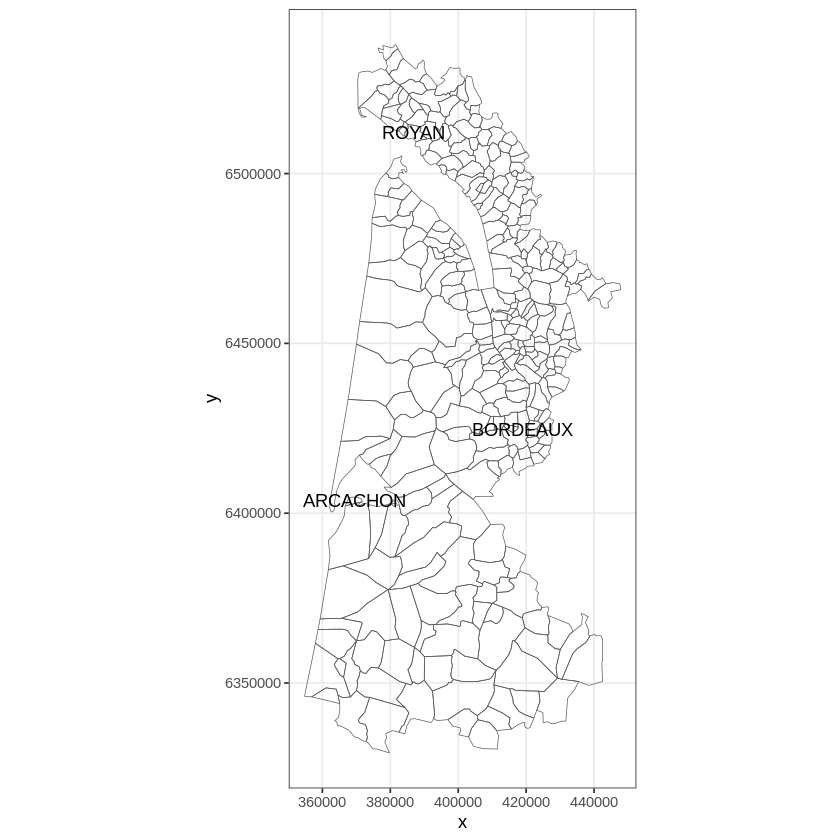

In [8]:
ggplot() +
  geom_sf(data = map, fill = NA) +
  geom_sf_text(data = sel, aes(label = NOM_COMM)) +
    theme_bw()

### Implementación

In [9]:
k3 <- kmeans(db, centers = 3, nstart = 25)
str(k3)

List of 9
 $ cluster     : Named int [1:303] 2 1 2 2 1 1 1 2 1 2 ...
  ..- attr(*, "names")= chr [1:303] "17015" "17021" "17030" "17034" ...
 $ centers     : num [1:3, 1:4] 24.5 27.5 29.3 14.7 14.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "employ.rate.city" "graduate.rate" "housing.appart" "agri.land"
 $ totss       : num 373529
 $ withinss    : num [1:3] 22690 19225 66595
 $ tot.withinss: num 108510
 $ betweenss   : num 265019
 $ size        : int [1:3] 82 103 118
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


La salida de `kmeans` posee mucha información útil siendo las  más importantes:

   - clúster: Un vector de números enteros (de 1:k) que indica el clúster al que se asigna cada punto.


In [ ]:
head(k3$cluster)

- centers: Una matriz de centros de los clusters.

In [10]:
k3$centers

,employ.rate.city,graduate.rate,housing.appart,agri.land
1,24.50902,14.66354,6.905244,51.44372
2,27.54184,14.46845,3.638350,78.61669
3,29.25034,16.89508,13.973644,10.85730


Generemos la prediccion en los datos y en el map

In [11]:
db<- db %>% mutate(cluster=factor(k3$cluster))
map<- map %>% mutate(cluster=factor(k3$cluster))

In [12]:
tail(db)

,employ.rate.city,graduate.rate,housing.appart,agri.land,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40297,46.51,19.86,6.58,9.909724,3
40303,38.52,13.95,2.86,36.248544,1
40307,50.41,18.23,7.94,16.493467,3
40319,27.53,19.42,1.80,9.403243,3
40323,18.89,14.52,2.73,12.783127,3
40332,31.03,15.85,8.45,19.875553,3


In [13]:
tail(map)

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,ID_GEOFLA,CODE_COMM,INSEE_COM,NOM_COMM,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,Y_CENTROID,Z_MOYEN,SUPERFICIE,POPULATION,CODE_CANT,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REGION,AREA_HA,geometry,cluster
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<MULTIPOLYGON>,<fct>
40297,20901,297,40297,LE SEN,4199,63426,4200,63445,110,5096,0.2,09,2,40,LANDES,72,AQUITAINE,5107.897,MULTIPOLYGON (((422284 6339...,3
40303,11846,303,40303,SOLFERINO,3867,63462,3879,63441,81,9883,0.4,20,2,40,LANDES,72,AQUITAINE,10025.141,MULTIPOLYGON (((384287 6335...,1
40307,4835,307,40307,SORE,4145,63647,4120,63629,78,14816,1.0,24,2,40,LANDES,72,AQUITAINE,14850.256,MULTIPOLYGON (((411137 6353...,3
40319,7154,319,40319,TRENSACQ,4002,63532,4032,63541,78,7893,0.3,20,2,40,LANDES,72,AQUITAINE,7945.290,MULTIPOLYGON (((411137 6353...,3
40323,25011,323,40323,VERT,4133,63388,4109,63394,91,3985,0.2,09,2,40,LANDES,72,AQUITAINE,4028.914,MULTIPOLYGON (((411345 6335...,3
40332,32411,332,40332,YCHOUX,3844,63666,3846,63699,55,11159,1.8,15,2,40,LANDES,72,AQUITAINE,11218.750,MULTIPOLYGON (((387110 6360...,3


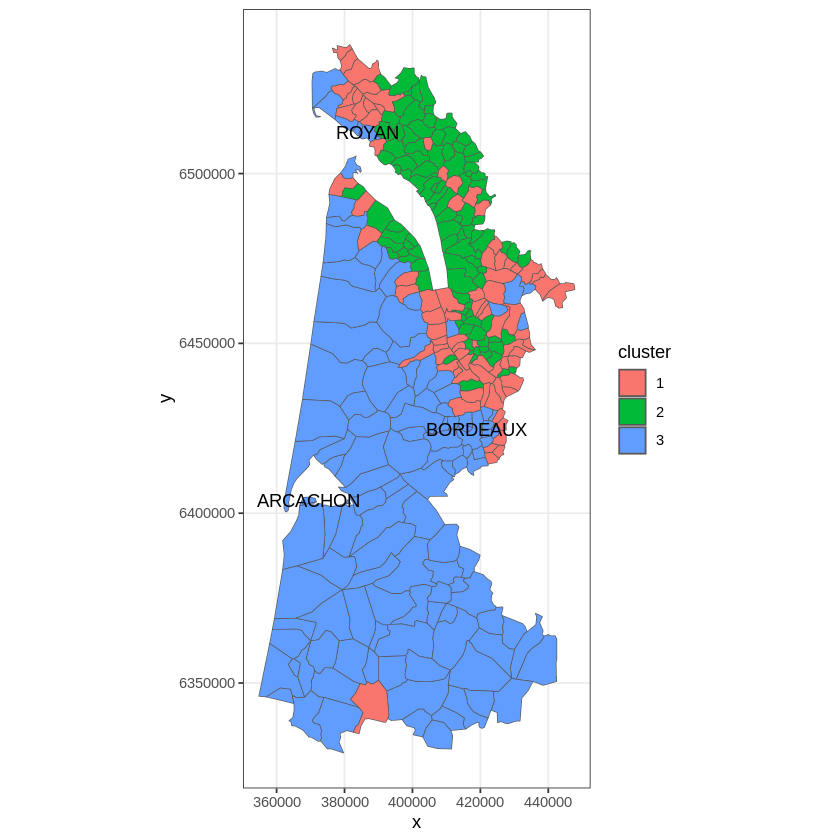

In [14]:
ggplot() +
  geom_sf(data = map, aes(fill = cluster)) +
  geom_sf_text(data = sel, aes(label = NOM_COMM)) +
    theme_bw()

Evaluemos el número de clusters

[1] 0.5462366

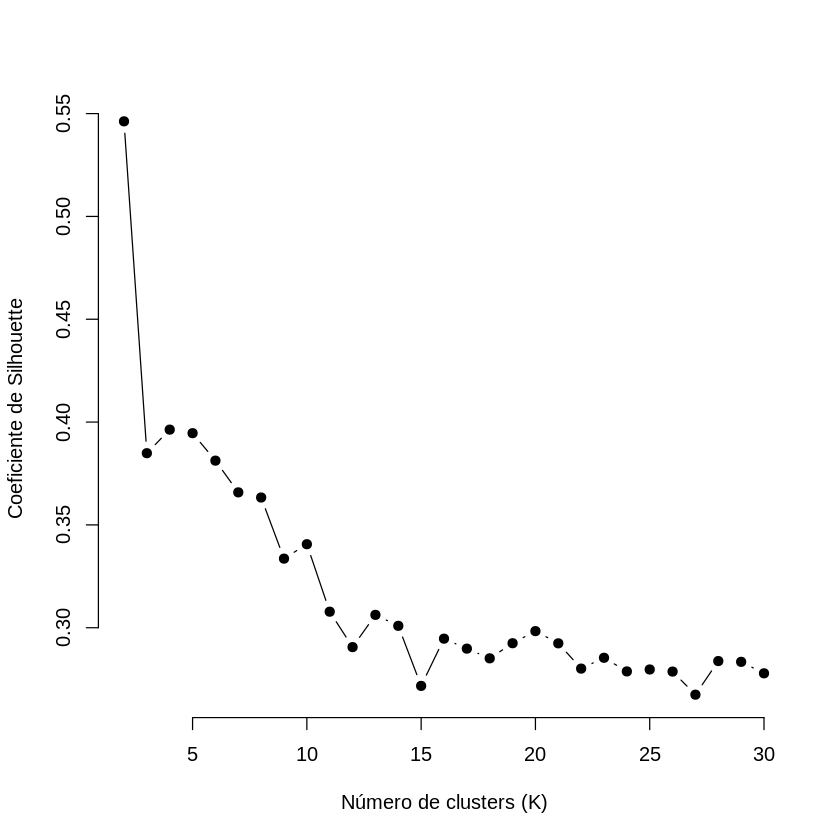

In [15]:
p_load("cluster")
# función para extraer el coeficiente de silhouette

avg_sil <- function(k) {
  km.res <- kmeans(db, centers = k, nstart = 25)
  ss <- cluster::silhouette(km.res$cluster, dist(db))
  mean(ss[, 3])
}
avg_sil(2)

# Calcular el coeficiente de silhouette para  k = 2 hasta k = 6
valores_sil <-  sapply(2:30,avg_sil)

plot(2:30, valores_sil,
       type = "b", pch = 19, frame = FALSE,
       xlab="Número de clusters (K)",
       ylab = "Coeficiente de Silhouette")

In [16]:
k30 <- kmeans(db, centers = 15, nstart = 25)
map<- map %>% mutate(cluster=factor(k30$cluster))

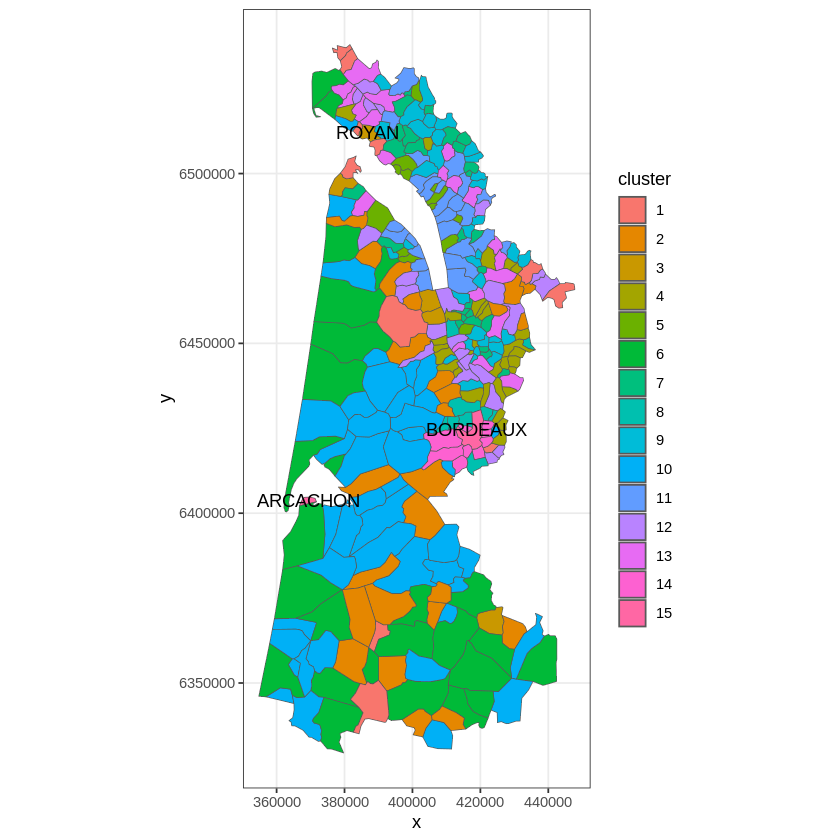

In [17]:
ggplot() +
  geom_sf(data = map, aes(fill = cluster)) +
  geom_sf_text(data = sel, aes(label = NOM_COMM)) +
    theme_bw()


## Caveat

Los métodos de clustering son exploratorios: se pueden utilizar para evaluar la calidad de los datos y generar hipótesis.

Pero no importa lo que entre en el algoritmo de agrupamiento, los clusters salen. Esta es una situación clásica de "basura que entra, basura que sale".



![](https://github.com/ignaciomsarmiento/BDML_202401/blob/main/Modulo06/figs/Garbage-Model.jpg?raw=1)



Obviamente, esperamos que lo que se está metiendo en el análisis no sea basura, pero eso no garantiza que salga una "pearl of wisdom".

La conclusión es que la agrupación es buena si es útil para responder el problema en particular. Pero, esto es difícil de evaluar.


Hay medidas de cuán bueno es el agrupamiento. Funcionan según el principio de que las distancias entre los elementos del mismo grupo deben ser pequeñas y las distancias entre los elementos de diferentes grupos deben ser grandes.

Esta es una verificación interna de la "estrechez" de los grupos, pero no garantiza que los grupos sean útiles y/o significativos para el problema bajo estudio. Esto requiere que el usuario utilice su capacidad y discernimiento.

## Clustering Jerárquico

- Este método es especialmente útil cuando no existen expectativas sobre los patrones y estructuras subyacentes de los datos.


- Una característica atractiva es que no es necesario especificar el número de clusers a buscar a priori como en   k-medias


- Este  mide la conectividad entre las observaciones en algún espacio de características o conjunto de datos.


- Podemos usar los resultados para visualizar su similitud espacial entre sí en una variedad de niveles, típicamente en forma de dendrograma, que es una estructura similar a un árbol que muestra progresivamente las similitudes entre las observaciones.


- En algunos casos puede informar a los otros métodos de clustering  basados en los patrones revelados. Por ejemplo, si el dendrograma revela dos grupos naturales, entonces una segunda etapa puede inicializar un algoritmo de k-medias con dos conglomerados. Al especificar el algoritmo de k-medias, podríamos comparar directamente la validez interna de ambos algoritmos  para determinar cuál es mejor para agrupar los datos a lo largo de una variedad de dimensiones (p. ej., conectividad, compacidad, etc.).


- Hay dos tipos de agrupamiento jerárquico:
    -  aglomerativo (de abajo hacia arriba) y
    -  divisivo (de arriba hacia abajo).

- Incorpora fácilmente la geografía

### Etapas

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk}
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering jerárquico: depende como se define la conectividad



### Definición de la matriz de distancia o disimilitud:

- Un problema de la distancia euclídiana, como medida de similaridad, es su dependencia de las diferentes escalas en que estén medidas las variables.

- Escalas y rangos de variación diferentes pueden afectar al análisis de clusters.

- Este problema se soluciona si en vez de calcular la distancia euclídea con puntuaciones directas se calcula con puntuaciones normalizadas.

- Estandarizar las puntuaciones de los sujetos en las variables es uno de los procedimientos de normalización más frecuentes en análisis de datos.

EJEMPLO: Supongamos que estamos interesados en agrupar a una muestra de 5 familias en base al número de hijos, al
sueldo en euros al mes y al tamaño de la casa en metros cuadrados. La matriz de datos de la que partimos es:

In [ ]:

# Create a data frame in R
Ej <- data.frame(Hijos = c(1, 1, 4, 0, 2),
                Salario = c(723, 900, 800, 1205, 600),
                Metros2 = c(60, 60, 80, 50, 65))

# Print the data frame
Ej


Podemos como antes calcular las distancias entre los sujetos a partir de las puntuaciones directas o bien podemos calcularlas a partir de las variables estandarizadas.

In [ ]:
distance_matrix <- as.data.frame(as.matrix(dist(Ej, method = "euclidean")))
distance_matrix

Como puede observarse, las familias más parecidas son la familia primera y la tercera. Sin embargo, son familias que salvo en que tienen un salario similar son diferentes en el resto de las variables. Si por el contrario seleccionamos la opción estandarizar la matriz de distancias que obtenemos es:

In [ ]:
distance_matrix2 <- as.data.frame(as.matrix(dist(scale(Ej), method = "euclidean")))
distance_matrix2

- Con las puntuaciones estandarizadas las familias más parecidas son la primera y la segunda.

- Es evidente que los resultados de un análisis de clusters son distintos si se parte de matrices de similaridad o distancia que ordenen a los sujetos de manera distinta.

- Es por ello que en caso de variables medidas en escalas distintas es necesario normalizar.

EJEMPLO 2.  Supongamos que tenemos los siguientes datos

In [ ]:
# Create a data frame in R
D <- data.frame(Edad = c(22, 25, 30, 38, 42, 47, 55, 62, 61, 90),
                Genero = factor(c("M", "M", "F", "F", "F", "M", "M", "M", "M", "M")),
                Estado_Civil = factor(c("Soltero", "Soltero", "Soltero", "Casado", "Casado", "Soltero", "Casado", "Divorciado", "Casado", "Divorciado")),
                Salario = c(18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000),
                tiene_hijos = factor(c("No", "No", "No", "Si", "Si", "No", "No", "No", "No", "Si")),
                Volumen_compras = factor(c("Bajo", "Bajo", "Bajo", "Alto", "Alto", "Bajo", "Medio", "Medio", "Medio", "Bajo")))

# Print the data frame
D


**Distancia de Gower**

- Para una característica numérica, la diferencia parcial entre dos clientes i y j es la resta entre sus valores en la característica específica (en valor absoluto) dividida por el rango total de la característica. El rango de salario es 52000 (70000–18000) mientras que el rango de edad es 68 (90–22).
    Note, hay que tener en cuenta si existen outliers o valores atípicos. Un valor erróneo extremadamente grande o pequeño afectaría directamente el rango y, por lo tanto, las diferencias en esa característica, distorsionando su importancia.

-    Para una característica categórica, la diferencia parcial entre dos clientes es uno cuando ambos clientes tienen un valor diferente para esta característica. Cero en caso contrario.

La Disimilitud de Gower entre ambos clientes es el promedio de disimilitudes parciales a lo largo de las diferentes características:

  

In [ ]:
p_load("gower")
distance_matrix <- daisy(D, metric="gower")
distance_matrix_df <- as.data.frame(as.matrix(distance_matrix))

In [ ]:
distance_matrix_df

In [ ]:
abs(22-25)/68

In [ ]:
abs(18000-23000)/52000

Entre la primera y la segunda

\begin{align}
\frac{(0,044118 + 0 + 0 + 0,096154 + 0 + 0)}{ 6} = 0,023379.
\end{align}

Como el valor es cercano a cero, podemos decir que ambas observaciones son muy similares.

### Enlaces



- Por lo tanto, con nuestros datos de distancia estandarizados, podemos entrenar un algoritmo de agrupamiento jerárquico, pero como el algoritmo procede en forma de pares, debemos especificar con precisión cómo se unen estos pares.


- El método de enlace es el mecanismo para determinar cómo se unen los pares de datos.  Hay muchos métodos de vinculación entre los que elegir:

   - *Enlace simple*
   - *Enlace completo (complete linkage - CL)*
   - *Enlace promedio de grupo (average )*
   - *Enlace usando centroides (Centroid)*
   - *Enlace de Ward*
   
   
- Es importante señalar que, al igual que las medidas de distancia, no existe una guía en la literatura sobre cuál es el mejor método de enlace.


- La selección del método de enlace generalmente depende de las preferencias específicas del problema o disciplina, por ejemplo, el enlace centroide es popular entre los genetistas y ward entre los economistas.


- Se recomienda que se comparen varios métodos de enlace para descubrir patrones naturales de la manera más eficiente posible.


- Es importante reiterar que solo los algoritmos jerárquicos requieren la especificación de un método de vinculación, sin embargo, todos los algoritmos de agrupamiento requieren la especificación y el cálculo de una distancia entre las observaciones, aunque alguno de ellos lo hacen de forma implícita.


#### Enlace completo (complete linkage - CL)
   
   El enlace completo o técnica del vecino más lejano, es lo opuesto al enlace simple y combina los clusters encontrando la distancia máxima entre las observaciones del cluster $G$ y las observaciones del cluster $H$:

   \begin{align}
     d_{CL}(G, H)= max_{i\in G,\ i'\in H} d_{ii'}
   \end{align}

   En otras palabras, funciona combinando clusters en función de los puntos más alejados entre los dos clusters.
   
   ##### Ejemplo:

|   | 1  | 2  | 3 | 4 | 5 |
|---|----|----|---|---|---|
| **1** | 0  |    |   |   |   |
| **2** | 9  | 0  |   |   |   |
| **3** | 3  | 7  | 0 |   |   |
| **4** | 6  | 5  | 9 | 0 |   |
| **5** | 11 | 10 | 2 | 8 | 0 |

<div >
<img src = "figures/complete_link0.png" />
</div>


|    | 35 | 1 | 2 | 4 |
|----|----|---|---|---|
| **35** | 0  |   |   |   |
| **1** | 11 | 0 |   |   |
| **2** | 10 | 9 | 0 |   |
| **4** | 9  | 6 | 5 | 0 |

<div >
<img src = "figures/complete_link1.png" />
</div>


|    | 35 | 1 | 2 4 |
|----|----|---|---|
| **35** | 0  |   | |
| **1** | 11 | 0 |   |
| **24** | 10 | 9 | 0 |  


<div >
<img src = "figures/complete_link.png" />
</div>


   - **Enlace simple**
   
   También conocido como técnica del vecino más cercano; en este método combinamos los clusters, basándonos en los dos puntos más cercanos de cada cluster. Para lograrlo, tomamos las distancias por pares entre las observaciones del cluster $G$ y las observaciones del cluster $H$, y guardamos la menor:

$$d_{SL}(G, H)= min_{i\in G,\ i'\in H} d_{ii'}$$


<div >
<img src = "figures/single_link.png" />
</div>


## Clustering Jerárquico en el Estuario

In [ ]:
db <- estuary$dat

In [ ]:
D0 <- dist(db) # the socio-economic distances
tree <- hclustgeo(D0) #clustering with ward distance

# Plot
plot(tree,hang = -1, label = FALSE,
     xlab = "", sub = "",
     main = "Ward dendrogram with D0 only")

rect.hclust(tree ,k = 5, border = c(4,5,3,2,1))
legend("topright", legend = paste("cluster",1:5),
       fill=1:5,bty= "n", border = "white")

In [ ]:
D0 <- dist(scale(db)) # the socio-economic distances

tree <- hclustgeo(D0)
plot(tree,hang = -1, label = FALSE,
     xlab = "", sub = "",
     main = "Ward dendrogram with D0 only")

rect.hclust(tree ,k = 5, border = c(4,5,3,2,1))
legend("topright", legend = paste("cluster",1:5),
       fill=1:5,bty= "n", border = "white")

In [ ]:
# cut the dendrogram to get the partition in 5 clusters
P5 <- cutree(tree,5)


In [ ]:
map<- map  %>% mutate(cluster=P5)

In [ ]:
ggplot() +
  geom_sf(data = map, aes(fill = as.factor(cluster))) +
  geom_sf_text(data = sel, aes(label = NOM_COMM)) +
    theme_bw()

### Incorporemos las restricciones geograficas


- Para obtener clusters más compactos espacialmente, incluimos en el proceso de clustering la matriz D1, que contiene las distancias entre los ayuntamientos de los municipios, junto con el parámetro de mezcla alpha que define la importancia relativa de D0 (distancias socioeconómicas) y D1 (distancias geográficas).


    La matriz de distancias final utilizada para el clustering se calcula como una combinación ponderada de las dos matrices de distancias). La fórmula general para calcular la matriz de distancias combinada usando alpha es:
$$
    D=\alpha ×D0+(1−\alpha)×D.geo
$$    

En esta fórmula, D0 representa la matriz de distancias socioeconómicas y D.geola matriz de distancias geográficas. Al variar $\alpha$, se ajusta la contribución relativa de cada tipo de distancia al resultado final del clustering.


In [ ]:
D1 <- as.dist(D.geo) # the geographic distances between the municipalities

Ponderación de Distancias:


### Selección del Parámetro  Alpha:
- El parámetro de mezcla alpha, que varía entre [0,1], ajusta la importancia de D0 y D1 en el proceso de clustering.
- Cuando alpha=0, las disimilitudes geográficas no se consideran, y cuando alpha=1, son las distancias socioeconómicas las que no se tienen en cuenta, formándose los clusters únicamente con las distancias geográficas.

- La elección del valor de alpha debe ser considerada cuidadosamente en función de los objetivos específicos del problema. Puede ser útil realizar análisis exploratorios con varios valores de alpha para observar cómo cambian los clusters y seleccionar el valor que mejor capture las características importantes del trabajo.




In [ ]:
range.alpha <- seq(0,1,0.1)
K <- 5
cr <- choicealpha(D0, D1, range.alpha,
  K, graph = FALSE)
cr$Q # proportion of explained homogeneity (inertia)

In [ ]:
plot(cr)

El gráfico de las curvas Q0 y Q1 es una herramienta valiosa para seleccionar un valor de alpha que equilibre la pérdida de homogeneidad socioeconómica con la ganancia en cohesión geográfica.


- **Q0**: Representa la homogeneidad socioeconómica de las particiones obtenidas. Refleja cuán similares son los municipios dentro de cada cluster en términos de sus características socioeconómicas.
- **Q1**: Representa la homogeneidad geográfica. Indica cuán cerca están geográficamente los municipios dentro de cada cluster.


### Implementando el Alpha Elegido


In [ ]:
treeD0D1 <- hclustgeo(D0,D1,alpha=0.3)


In [ ]:
plot(tree,hang = -1, label = FALSE,
     xlab = "", sub = "",
     main = "Ward dendrogram with D0 and D1")
rect.hclust(tree ,k = 5, border = c(4,5,3,2,1))
legend("topright", legend = paste("cluster",1:5),
       fill=1:5,bty= "n", border = "white")

In [ ]:
P5bis <- cutree(treeD0D1,5)

In [ ]:
map<- map  %>% mutate(cluster=P5bis)

In [ ]:
ggplot() +
  geom_sf(data = map, aes(fill = as.factor(cluster))) +
  geom_sf_text(data = sel, aes(label = NOM_COMM)) +
    theme_bw()